<a href="https://colab.research.google.com/github/msb1002/FYP_Project/blob/master/FYP_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Library

## Sun


In [ ]:
!pip install stockstats

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn
import os.path as osp
import torch.utils.data as data
import torch.nn.functional as F

from tqdm import tqdm
import time, matplotlib, torch, os
from statsmodels.tsa.arima_model import ARIMA
from torch.utils.tensorboard import SummaryWriter

from stockstats import StockDataFrame

In [ ]:
import os
from os import walk

import plotly
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
#import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
#For DNN / CNN+LSTM
import keras.backend as K
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Flatten, Dense

In [ ]:
#For SVR
from sklearn.svm import SVR

#For SVM
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
#For ARIMA
import math
import warnings
warnings.filterwarnings('ignore')
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
#from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## Anthony

In [ ]:
!pip install stockstats

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from stockstats import StockDataFrame

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from math import floor

import pandas_datareader.data as web
import pickle

## Thomas

In [ ]:
import pandas as pd
import numpy as np
import collections

In [ ]:
## DTC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [ ]:
from sklearn import tree 
import graphviz

In [ ]:
##SVR
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from datetime import datetime
from sklearn.model_selection import train_test_split
import pandas_datareader.data as web

# 2.Data importing and preprocessing

## Sun

### Data Preprocessing

In [ ]:
def finder(ds,target):
  for e in ds:
    if code in e:
      return e

def timestamp(i):
  formatted_date = datetime.fromtimestamp(i)
  return formatted_date

### Using pandas datareader for analysis

In [ ]:
import pandas_datareader.data as web

#Setting the index values as timestamp
def process():
  print("Enter the code of the model that you want to implement")
  code = input()
  #final_code = '^'+code
  final_code = code
  df_ = web.DataReader("AAPL", 'stooq')
  #df_['timestamp'] = df_.index.astype('int64')
  #df_.reset_index(drop=True, inplace=True)
  #df_.set_index('timestamp', inplace=True)

  print(f"Loading the dataset for the {code}")

  return df_

In [ ]:
#For now, the stock values for Apple (AAPL is returned)
df = process()

Enter the code of the model that you want to implement
AAPL
Loading the dataset for the AAPL


In [ ]:
def additional_features(df):
  #SMA
  df['10_sma'] = df['Close'].rolling(window=10,min_periods=1).mean()
  df['20_sma'] = df['Close'].rolling(window=20,min_periods=1).mean()
  df['50_sma'] = df['Close'].rolling(window=50,min_periods=1).mean()
  
  #EMA
  df['10_ema'] = df['Close'].ewm(span=10,min_periods=1).mean()
  df['20_ema'] = df['Close'].ewm(span=20,min_periods=1).mean()
  df['50_ema'] = df['Close'].ewm(span=50,min_periods=1).mean()

  #Bollinger
  df['bollinger_mean'] = df['Close'].rolling(20, min_periods=1).mean()
  df['bollinger_std'] = df['Close'].rolling(20, min_periods=1).std()
  df['BOL_UP'] = df['bollinger_mean'] + (2 * df['bollinger_std'])
  df['BOL_DOWN'] = df['bollinger_mean'] - (2 * df['bollinger_std'])
  df["bollinger_gap"] = df["BOL_UP"]-df['BOL_DOWN']
  df.dropna(inplace=True) #Not sure if I can change?

  price_change =  df['Close'].pct_change().fillna(0)
  df['percetage_change'] = price_change

  momentum = [1,1]
  for i in range(2,len(df)):
    momentum.append(1 if df['Close'][i] > df['Close'][i-1] else -1)
  df['momentum'] = momentum

In [ ]:
#Print the database for the implementations
additional_features(df)
df.head()

,Open,High,Low,Close,Volume,10_sma,20_sma,50_sma,10_ema,20_ema,50_ema,bollinger_mean,bollinger_std,BOL_UP,BOL_DOWN,bollinger_gap,percetage_change,momentum
Date,,,,,,,,,,,,,,,,,,
2022-04-05,177.50,178.30,174.415,175.06,73401786,173.445000,173.445000,173.445000,173.606500,173.525750,173.477300,173.445000,2.283955,178.012910,168.877090,9.135820,0.000000,1
2022-04-04,174.57,178.49,174.440,178.44,76545983,175.110000,175.110000,175.110000,175.549535,175.330233,175.198135,175.110000,3.305284,181.720567,168.499433,13.221135,0.019308,1
2022-04-01,174.03,174.88,171.940,174.31,78751328,174.910000,174.910000,174.910000,175.141163,175.035708,174.962605,174.910000,2.728235,180.366470,169.453530,10.912940,-0.023145,-1
2022-03-31,177.84,178.03,174.400,174.61,103049285,174.850000,174.850000,174.850000,174.988681,174.932733,174.886332,174.850000,2.366527,179.583054,170.116946,9.466108,0.001721,1
2022-03-30,178.55,179.61,176.700,177.77,92633154,175.336667,175.336667,175.336667,175.711085,175.531266,175.416259,175.336667,2.429285,180.195237,170.478096,9.717141,0.018097,1


### Additional preprocessing for backtesting

In [ ]:
#Leave olhc
df_olhcv = df[['Open','High','Low','Close','Volume']]
df_olhcv.columns = df_olhcv.columns.str.lower()
df_olhcv.head()

,open,high,low,close,volume
Date,,,,,
2022-04-05,177.50,178.30,174.415,175.06,73401786
2022-04-04,174.57,178.49,174.440,178.44,76545983
2022-04-01,174.03,174.88,171.940,174.31,78751328
2022-03-31,177.84,178.03,174.400,174.61,103049285
2022-03-30,178.55,179.61,176.700,177.77,92633154


In [ ]:
y = StockDataFrame(df_olhcv)
data_bt = y[['open','high','low','close','volume',
          'boll', 'boll_ub', 'boll_lb',
          'macd', 'macdh', 'macds',
          'rsi_11', 'rsi_14', 'rsi_21']]
data_bt.index = [int(str(ind)[0:4]+str(ind)[5:7]+str(ind)[8:10]) for ind in data_bt.index]
data_bt = data_bt.sort_index()
data_bt.head()

,open,high,low,close,volume,boll,boll_ub,boll_lb,macd,macdh,macds,rsi_11,rsi_14,rsi_21
20170410,33.893,33.960,33.729,33.791,70691358,34.04930,35.538299,32.560301,-0.572578,0.012143,-0.584721,42.779156,41.448494,41.565608
20170411,33.739,33.834,33.059,33.428,128704371,34.17730,35.979914,32.374686,-0.623744,-0.035987,-0.587756,33.488086,34.616279,37.524987
20170412,33.421,33.555,33.284,33.471,84222470,34.31455,36.286957,32.342143,-0.643017,-0.064258,-0.578759,34.084066,35.066361,37.820022
20170413,33.498,33.610,33.294,33.294,72623752,34.46530,36.618802,32.311798,-0.662643,-0.099948,-0.562695,29.381066,31.670588,35.842523
20170417,33.393,33.491,33.249,33.478,66196690,34.65050,37.007354,32.293646,-0.660032,-0.122323,-0.537708,31.505393,33.354352,37.007759


## Anthony

In [ ]:
start_date = "2000-01-01"
end_date = "2022-12-31"
stock_data = web.DataReader('AAPL', 'stooq',start=start_date, end=end_date)
stock_data.columns = ["open","high","low","close","volume"]

In [ ]:
# Use online package to generate additional features
x = StockDataFrame(stock_data)
data = x[['open','high','low','close','volume',
          'boll', 'boll_ub', 'boll_lb',
          'macd', 'macdh', 'macds',
          'rsi_11', 'rsi_14', 'rsi_21']]
data.index = [int(str(ind)[0:4]+str(ind)[5:7]+str(ind)[8:10]) for ind in data.index]
data = data.sort_index()

In [ ]:
# Split the train and test data
def custom_split(data,start,end):
    train = (data.index >= start) & (data.index <= end)
    train_X = data[train]
    
    return train_X

In [ ]:
start_date = []
num_period = 10
period_year = 1

start = 2022-(num_period+period_year-1)
for i in range(num_period):
    start_date.append((start+i)*10000+101)


date_range_list={}
for i in start_date:
    date_range_list[i] = (i-101)+(period_year-1)*10000+1231

print(date_range_list)

stock_list = {"BlockChain":["COIN","NVDA","FB"],
              "Airline":["BA","GD","LMT",],
              "Traveling":["UBER","ABNB","MAR","BKNG"],
              "Semiconductors":["INTC","NVDA","QCOM","MU","AMD"],
              "Cloud Computing":["IBM", "AMZN","GOOG","CRM"],
              "Social Media":["TWTR","SNAP","PINS","FB"],
              "Entertainment":["DIS","NFLX","FB"],
              "Retail":["WMT","COST","TGT","BBY","HD"],
              "Franchise":["MCD", "YUM", "SBUX", "DPZ"],
              "Real Estate":["HST", "EQR", "AVB", "PLD", "SPG"],
              "Telecommunication":["T","TMUS","VZ","CMCSA","CHTR"],
              "Energy & Resources":["DOW", "DD"],
              "Luxury goods":["RACE","EL","PVH"]
                            }

start_date = "2000-01-01"
end_date = "2022-12-31"


do_nth_name = "Buy&Hold"
model_name = "WithModel"

backtest_col = ["Sector","Stock",
                "Range_Start","Range_End",
                do_nth_name+"_Profit",model_name+"_Profit",
                do_nth_name+"_CAGR(in %)",model_name+"_CAGR(in %)",
                "CAGR_Performance(in %)",
                do_nth_name+"_MDD(in %)",model_name+"_MDD(in %)",
                "MDD_Performance(in %)"]

{20120101: 20121231, 20130101: 20131231, 20140101: 20141231, 20150101: 20151231, 20160101: 20161231, 20170101: 20171231, 20180101: 20181231, 20190101: 20191231, 20200101: 20201231, 20210101: 20211231}


In [ ]:
backtest_col
stoc

['Sector',
 'Stock',
 'Range_Start',
 'Range_End',
 'Buy&Hold_Profit',
 'WithModel_Profit',
 'Buy&Hold_CAGR(in %)',
 'WithModel_CAGR(in %)',
 'CAGR_Performance(in %)',
 'Buy&Hold_MDD(in %)',
 'WithModel_MDD(in %)',
 'MDD_Performance(in %)']

## Thomas

In [ ]:
## Choose your stock
start_date = "2010-01-01"
end_date = "2022-12-31"
stock = web.DataReader('CCL', 'stooq',start=start_date, end=end_date)


In [ ]:
stock = stock.reindex(index=stock.index[::-1])

In [ ]:
stock['Future'] = stock['High'].rolling(window = 30).mean()[::-1].shift(19)
stock['Future']

Date
2022-03-11   NaN
2022-03-10   NaN
2022-03-09   NaN
2022-03-08   NaN
2022-03-07   NaN
              ..
2017-03-21   NaN
2017-03-20   NaN
2017-03-17   NaN
2017-03-16   NaN
2017-03-15   NaN
Name: Future, Length: 1258, dtype: float64

In [ ]:
stock['Return'] = stock['High'].pct_change(50).shift(-100)
features = ['High','Volume']

# 3.Models

## Sun

### SVR

In [ ]:
from sklearn.svm import SVR

def svr_func(df_):
  train_df = df_
  #Data Preprocessing
  train_df_svr = train_df.head(len(train_df)-1) 
  days = train_df_svr.index.tolist()
  days = [[i] for i in days]
  #adj_prices = [[i] for i in adj_prices]
  adj_prices = train_df_svr['Close'].tolist()
  train_X, test_X, train_y, test_y = train_test_split(days, adj_prices, test_size=0.25)

  #SVR Models-1
  #lin_svr = SVR(kernel='linear',C=1000.0)
  #lin_svr.fit(train_X,train_y)

  #SVR Models-2
  poly_svr = SVR(kernel='poly',C=1000.0, degree=2)
  poly_svr.fit(train_X,train_y)

  #SVR Models-3
  rbf_svr = SVR(kernel='rbf',C=1000.0, gamma = 0.15)
  rbf_svr.fit(train_X,train_y)

  #performance evaluation

  print("Pure prediction section")
  print("Actual score - poly")
  print(poly_svr.score(test_X, test_y))
  print("Actual score - rbf")
  print(rbf_svr.score(test_X, test_y))

  print("------------------------------------")
  #svr_list = [lin_svr,poly_svr,rbf_svr]
  svr_list = [poly_svr,rbf_svr]
  for svr in svr_list:
    svr_predict = svr.predict(test_X)

    print('SVR {} PERFORMANCE'.format(str(svr)))
    print('r2 score: '+str(r2_score(test_y, svr_predict)))
    print('RMSE : '+str(np.sqrt(mean_squared_error(test_y, svr_predict))))
    print("Mean Absolute Error : " + str(mean_absolute_error(test_y,svr_predict)))


def svm_func(df_):

  print("Momentum prediction - as classifier")

  length = len(df)

  X = np.transpose(np.array([df['percetage_change'],df['bollinger_gap'],df['bollinger_mean'],df['bollinger_std']]))
  Y = np.array(df['momentum'])

  X_train = X[0:int(0.8*length)]
  X_test = X[int(0.8*length):]
  y_train = Y[0:int(0.8*length)]
  y_test = Y[int(0.8*length):]


  poly_svm = svm.SVC(kernel='poly')
  poly_svm.fit(X_train, y_train)
  poly_score = poly_svm.score(X_test, y_test)
  print("Prediction score for poly SVM classifier : ",poly_score)

  rbf_svm = svm.SVC(kernel='rbf')
  rbf_svm.fit(X_train, y_train)
  rbf_score = rbf_svm.score(X_test, y_test)
  print("Prediction score for RBF SVM classifier : ",rbf_score)



In [ ]:
import pandas as pd
from sklearn import svm

svr_func(df)

TypeError: ignored

In [ ]:
svm_func(df)

Momentum prediction - as classifier
Prediction score for poly SVM classifier :  0.5198412698412699
Prediction score for RBF SVM classifier :  0.5198412698412699


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

train_X, val_X, train_y, val_y = train_test_split(X, Y,random_state = 1002)

tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf'],'C': [1,100,1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='accuracy')
clf.fit(train_X, train_y)

clf.best_params_

NameError: ignored

In [ ]:
clf.best_params_

NameError: ignored

### DNN Model(pure)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
#Data Pre-processing
train_df = df

X = train_df[['Open','High','Low','Volume']]
Y = train_df[['Close']]

X_scaler = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = X_scaler.fit_transform(X[X.columns])
X = X.fillna(X.median())

Y_scaler = MinMaxScaler(feature_range=(0, 1))
Y[Y.columns] = Y_scaler.fit_transform(Y[Y.columns])
Y = Y.fillna(Y.median())

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.25)

In [ ]:
#Model
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu", input_shape=(4,)),
        layers.Dense(128, activation="relu", name="layer1"),
        layers.Dense(256, activation="relu", name="layer2"),
        layers.Dense(1,activation="linear", name="layer3")
    ]
)

model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(train_X,train_y,validation_data=(val_X, val_y),epochs = 200 ,batch_size = 10,verbose=False)

NameError: ignored

In [ ]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();
history_df['val_loss'].plot();
plt.title("Simple DNN Architecture")

NameError: ignored

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                320       
                                                                 
 layer1 (Dense)              (None, 128)               8320      
                                                                 
 layer2 (Dense)              (None, 256)               33024     
                                                                 
 layer3 (Dense)              (None, 1)                 257       
                                                                 
Total params: 41,921
Trainable params: 41,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:


dnn_predict = model.predict(test_X)

print('SIMPLE DNN PERFORMANCE')
print('r2 score: '+str(r2_score(test_y, dnn_predict)))
print('RMSE : '+str(np.sqrt(mean_squared_error(test_y, dnn_predict))))
print("Mean Absolute Error : " + str(mean_absolute_error(test_y,dnn_predict)))

SIMPLE DNN PERFORMANCE
r2 score: -1.1999354179002282
RMSE : 0.46425889782401564
Mean Absolute Error : 0.3367392089881141


In [ ]:
dnn_predict

-0.01256341

Complex DNN Model

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.25)
train_X,val_X,train_y,val_y = train_test_split(train_X, train_y, test_size=0.25)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001, # minimium change considered improvement
    patience=50, # how many epochs to wait before stopping
    restore_best_weights=True,
)

#train_X, test_X, train_y, test_y
model = keras.Sequential([
    layers.Dense(units=1024, input_shape=[len(train_X.columns)]),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1)

])

model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=True
)

Epoch 1/200
3/3 [==============================] - 2s 271ms/step - loss: 1.7399 - val_loss: 0.3193
Epoch 2/200
3/3 [==============================] - 0s 110ms/step - loss: 1.3498 - val_loss: 0.2442
Epoch 3/200
3/3 [==============================] - 0s 85ms/step - loss: 0.9103 - val_loss: 0.2518
Epoch 4/200
3/3 [==============================] - 0s 85ms/step - loss: 0.7357 - val_loss: 0.2396
Epoch 5/200
3/3 [==============================] - 0s 99ms/step - loss: 0.6757 - val_loss: 0.1740
Epoch 6/200
3/3 [==============================] - 0s 96ms/step - loss: 0.6583 - val_loss: 0.2039
Epoch 7/200
3/3 [==============================] - 0s 88ms/step - loss: 0.5785 - val_loss: 0.2466
Epoch 8/200
3/3 [==============================] - 0s 85ms/step - loss: 0.5593 - val_loss: 0.2395
Epoch 9/200
3/3 [==============================] - 0s 92ms/step - loss: 0.5654 - val_loss: 0.2028
Epoch 10/200
3/3 [==============================] - 0s 141ms/step - loss: 0.5384 - val_loss: 0.2070
Epoch 11/200
3/3

KeyboardInterrupt: ignored

In [ ]:
#Expressing the loss - underfitting
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();
history_df['val_loss'].plot();
plt.title("Complex DNN Structure")

NameError: ignored

XGBoost

In [ ]:
from xgboost import XGBRegressor

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2)
model = XGBRegressor(learning_rate = 0.01,n_estimators=1000)

model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(test_X, test_y)], verbose=False)
xgb_pred_y = model.predict(test_X)

[13:58:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Performance evaluation
print('XGBOOST PERFORMANCE')
print('r2 score: '+str(r2_score(test_y, xgb_pred_y)))
print('RMSE : '+str(np.sqrt(mean_squared_error(test_y, xgb_pred_y))))
print("Mean Absolute Error : " + str(mean_absolute_error(test_y,xgb_pred_y)))

XGBOOST PERFORMANCE
r2 score: 0.9994762276549368
RMSE : 0.007001538922428736
Mean Absolute Error : 0.004287173785081848


CatBoost

In [ ]:
pip install catboost

     |████████████████████████████████| 76.6 MB 935 kB/s 


In [ ]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor(random_state=1002,logging_level='Silent')

model_cat.fit(train_X, train_y, plot=True)
pred_cat = model_cat.predict(test_X, verbose=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
#Performance evaluation
print('CATBoost PERFORMANCE')
print('r2 score: '+str(r2_score(test_y, pred_cat)))
print('RMSE : '+str(np.sqrt(mean_squared_error(test_y, pred_cat))))
print("Mean Absolute Error : " + str(mean_absolute_error(test_y,pred_cat)))

CATBoost PERFORMANCE
r2 score: 0.9993251040201563
RMSE : 0.007947685001804641
Mean Absolute Error : 0.005133748168232367


ARIMA

ARIMA - Auto Regression Integrated Moving Average (AR, I, MA)

**p**: order of the autoregressive model (how lagged it is) -> # of preceding Y values that needs to be added

**d**: degree of differencing (How much the value is different from the previous) -> d until it makes data stationary (const variance)

e.g. 

If d=1:  yt  =  Yt - Yt-1

If d=2:  yt  =  (Yt - Yt-1) - (Yt-1 - Yt-2)  = Yt - 2Yt-1 + Yt-2

**q** : Order of moving average (MA) - error terms (adding the noise)

Criteria 

- ACF,PACF graph : appropriateness of the model
- AIC : Lowest
- BIC : Lowest

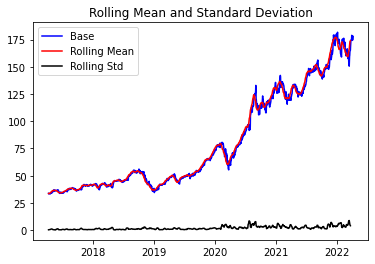

Results of dickey fuller test
Test Statistics           -1.457635
p-value                    0.554355
# lags                    20.000000
# observations used     1236.000000
critical value (1%)       -3.435652
critical value (5%)       -2.863881
critical value (10%)      -2.568016
dtype: float64


In [ ]:
df_close = df['Close']

#For the ADF test

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() #window size 12 mean

    rolstd = timeseries.rolling(12).std() #windoiw size 12 std
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Base')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')

    # Resulting test statistics, p-value, lags used and number of observation
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','# lags','# observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

Unit Root Test : Time Series y_t = D_t + z_t + e_t

D_t : Deterministic (trend,season)
z_t : stochastic (random walk with a drift) testing this part
e_t : stationary error
Model with unit root has a "spike and shocks" = high unit root means highly stochastic

Critical value (1%,5%,10% C.I) < Test Statistics

H_0 : (O) unit root exists vs H_a : (X) unit root does not exist

NOT Stationary

In [ ]:
#The data is non-linear
#Analyzing the Close, Trend, and seasonality
result = seasonal_decompose(df_close, model='multiplicative', period = 30)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 8)

TypeError: ignored

Based on the graph above, it is evident that there is a downward trend in Close price, meaning that the data is **not stationary**

- mean should be stationary over time
- variance should not be function of time (homoscedasticity)
-covariance should not be function of time



Methods to make data stationary : https://people.duke.edu/~rnau/whatuse.htm

In [ ]:
#Log,Differencing to make it stationary - Transformations such as logarithms can help to stabilise the variance of a time series. 
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()

#Separating the training and testing
train_data, test_data = df_log[:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

Autocorrelation : relationship between the lags (serial correlation)
- X axis : # of lags
- Y axis : Moran's I (how one is similar to surrounding)

Below

- ACF : Quite close to one another and is all in one side
-PACF : Part of y(t) vs y(t-2) not explained by y(t-1)

AR : ACF decrease slowly & PACF sharp drop

MA : ACF sharp drop & PACF gradual decline

ARMA : moth ACF & PACF decrease

e.g. 둘 다 서서히 줄어들면 ARMA(1,1), ACF에서 두번 쭉 떨어지면 MA(2)

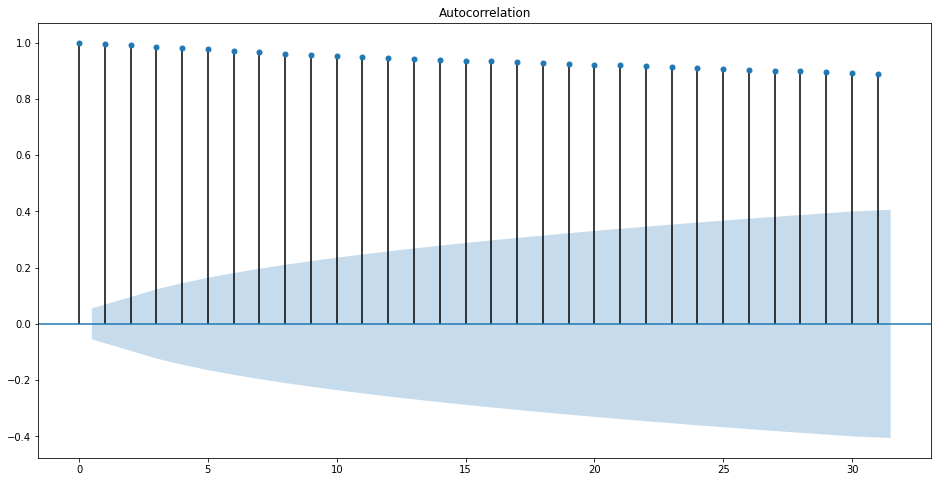

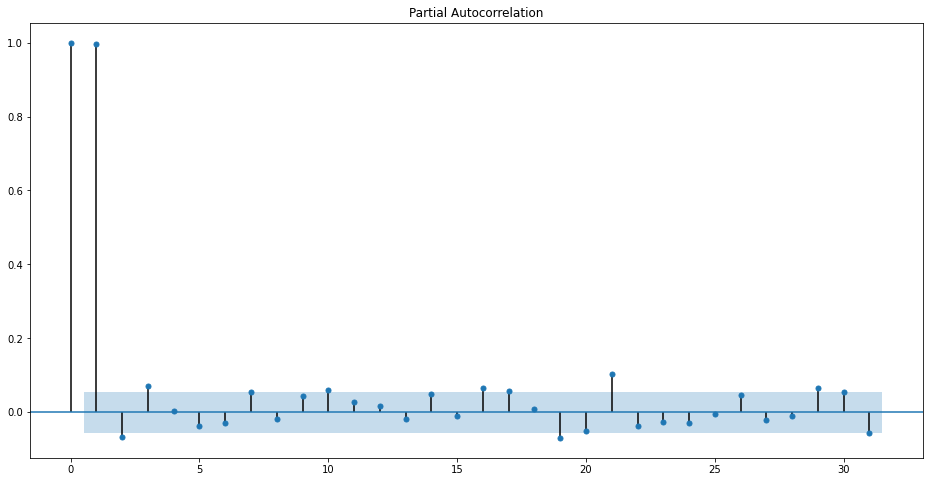

In [ ]:
#Auto-correlation
plt.rcParams["figure.figsize"] = (16,8)
plot_acf(Y**2)
plt.show()

#Partial Auto-correlation
plot_pacf(Y**2)
plt.show()

In [ ]:
#Selecting the mest ARIMA combination
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())

model_autoARIMA.plot_diagnostics(figsize=(15,8))

plt.show()


NameError: ignored

Reference: https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMAResults.plot_diagnostics.html

Produces a 2x2 plot grid with the following plots (ordered clockwise from top left):

1. Standardized residuals over time

2. Histogram plus estimated density of standardized residuals, along with a Normal(0,1) density plotted for reference. (KDE - Epanechnikov kernel function)

3. Normal Q-Q plot, with Normal reference line. (finding the apt distribution)

4. Correlogram

In [ ]:
!pip install statsmodels

In [ ]:
#As expected, better to use the AR > MA focused model
#Best model:  ARIMA(9,1,0)(0,0,0)[0]

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data, order=(9,1,0))  
arima_model = model.fit()

print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1130
Model:                 ARIMA(9, 1, 0)   Log Likelihood                2833.789
Method:                       css-mle   S.D. of innovations              0.020
Date:                Sun, 27 Mar 2022   AIC                          -5645.578
Time:                        08:12:31   BIC                          -5590.248
Sample:                             1   HQIC                         -5624.674
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0014      0.001     -2.410      0.016      -0.002      -0.000
ar.L1.D.Close    -0.0866      0.030     -2.924      0.004      -0.145      -0.029
ar.L2.D.Close    -0.0043      0.030     

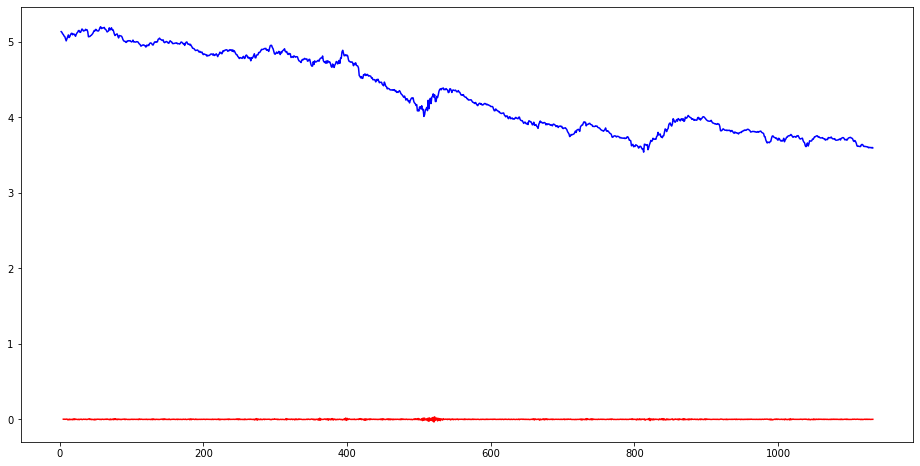

In [ ]:
#train,test -> after the log / difference
plt.plot(train_data,color='blue')

model = ARIMA(train_data[1:], order=(9,1,0))
results = model.fit()
plt.plot(results.fittedvalues[1:], color='red')

In [ ]:
model = ARIMA(train_data, order=(9,1,0))

In [ ]:
r = model.fit()

ValueError: ignored

In [ ]:
x = r.predict(start=len(train_data),end=len(df))

NameError: ignored

NameError: ignored

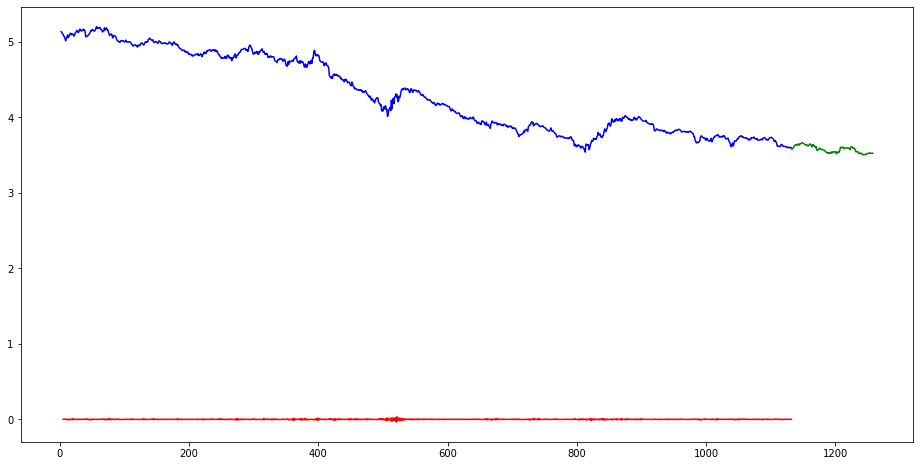

In [ ]:
plt.plot(train_data,color='blue')
plt.plot(results.fittedvalues[1:], color='red')
plt.plot(test_data,color='green')
plt.plot(x,color='orange')

Autoregressive models are used for 
1. Stationary (AR)
2. Trend (ARIMA)
3. Seasonality (SARIMA)


ARCH - AR(p) model applied to variance of time series


RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

final_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,random_state=0))
                             ])
# cv returns negative MAE, so *-1
scores = -1 * cross_val_score(final_pipeline, X, Y,
                              cv=5, #how many partitions they have
                              scoring='neg_mean_absolute_error')

In [ ]:
scores

array([0.077025  , 0.02609193, 0.00329158, 0.00198703, 0.00303056])

CNN + LSTM

## Anthony

### CNN_LSTM (Price Prediction)

#### Load Data

In [ ]:
train_X = custom_split(data,start = 20130101,end = 20171031)
valid_X = custom_split(data,start = 20171101,end = 20181231)
test_X = custom_split(data,start = 20190101,end = 20201231)

#### Label the target result

In [ ]:
# Assume we use 10 days price data to predict opening price of the 11th day
num_day_to_predict = 10

In [ ]:
def produce_result_target_price(X,num_day,result_col_name = "result_price"):
    y = pd.DataFrame(np.nan, index=X.index, columns=[result_col_name])
    for i in range(len(X)-num_day):
        y.iloc[i+num_day_to_predict,0] = X.iloc[i+num_day,0]
    return y

In [ ]:
train_y = produce_result_target_price(train_X,num_day_to_predict)
valid_y = produce_result_target_price(valid_X,num_day_to_predict)
test_y = produce_result_target_price(test_X,num_day_to_predict)

#### Transform the X, y data into tensor

In [ ]:
def transform_data_to_tensor(X,y,num_day):
    # Initiate tensor for X
    x_first = X.iloc[0:num_day,:]
    x_mean = x_first.mean(axis=0) # Get the mean of the 10-day frame
    x_std = x_first.std(axis=0) # Get the std of the 10-day frame
    x_first = x_first.sub(x_mean, axis=1).div(x_std, axis=1) # Normalize the 10-day frame here
    
    # Initiate tensor for y
    x_open = X.iloc[0:num_day,0]
    y_val = y.iloc[num_day,:] # Get the corresponding y
    y_val = y_val.sub(x_open.mean(axis=0)).div(x_open.std(axis=0)) # Normalize the y
    
    x_tf_data = [tf.convert_to_tensor(np.array(x_first),dtype = tf.float32)]
    y_tf_data = [tf.convert_to_tensor(np.array(y_val),dtype = tf.float32)]
    
    for i in range(1,len(X)-num_day):   
        x_window = X.iloc[i:i+num_day,:] # Set the window as a 10-day frame 
        x_mean = x_window.mean(axis=0) # Get the mean of the 10-day frame
        x_std = x_window.std(axis=0) # Get the std of the 10-day frame
        x_window = x_window.sub(x_mean, axis=1).div(x_std, axis=1) # Normalize the 10-day frame here
        
        x_open = X.iloc[i:i+num_day,0] # Get the opening price of the 10-day frame
        y_val = y.iloc[i+num_day,:] # Get the corresponding y
        y_val = y_val.sub(x_open.mean(axis=0)).div(x_open.std(axis=0)) # Normalize the y
        
        x_next_tf = tf.convert_to_tensor(np.array(x_window),dtype = tf.float32)
        x_tf_data = tf.concat([x_tf_data, [x_next_tf]], 0)
        
        y_next_tf = tf.convert_to_tensor(np.array(y_val),dtype = tf.float32)
        y_tf_data = tf.concat([y_tf_data, [y_next_tf]], 0)
    return (tf.reshape(x_tf_data,(-1,10,14,1)),y_tf_data)

In [ ]:
tf_train_X,tf_train_y = transform_data_to_tensor(train_X,train_y,num_day_to_predict)
tf_valid_X,tf_valid_y = transform_data_to_tensor(valid_X,valid_y,num_day_to_predict)
tf_test_X,tf_test_y = transform_data_to_tensor(test_X,test_y,num_day_to_predict)

#### Build the Model

In [ ]:
def myModel(input_shape,
            encoder_unit = 100,
            repeat_vector_n = 10):
    
    inputs = layers.Input(input_shape)
    
    print("Input: ",inputs.shape)
    
    # First Convolution + MaxPooling + Dropout
    x = layers.Conv2D(filters = 64,kernel_size=(3,3), strides = (1,1), activation='relu', padding='valid')(inputs)
    x = layers.MaxPooling2D(pool_size=(2,2),strides=(2,1), padding='valid')(x)
    x = layers.Dropout(rate = 0.01)(x)
    print("1 Cov: ",x.shape)
    
    # Second Convolution + MaxPooling + Dropout
    x = layers.Conv2D(filters = 16,kernel_size=(3,3), strides = (1,1), activation='relu', padding='valid')(x)
    x = layers.MaxPooling2D(pool_size=(2,2),strides=(2,1), padding='valid')(x)
    x = layers.Dropout(rate = 0.01)(x)
    print("2 Cov: ",x.shape)
    
    # Flatten Layer
    x = layers.Flatten()(x)
    print("Flatten: ",x.shape)
    
    # Repeat Vector Layer
    x = layers.RepeatVector(n = repeat_vector_n)(x)
    print("RepeatVector: ",x.shape)
    
    # Connect to LSTM
    x = layers.LSTM(units = encoder_unit, input_shape=(5,1))(x)
    print("LSTM: ",x.shape)
    
    # Add the Dense Layer with relu activation
    x = layers.Dense(units = 50,activation = "relu")(x)
    print("1 Dense: ",x.shape)
    
    # Add the last Dense Layer with sigmoid activation
    outputs = layers.Dense(units = 1,activation = "sigmoid")(x)
    print("Output: ",outputs.shape)
    
    return keras.Model(inputs=inputs, outputs=outputs)

#### Model Training and Fitting and Validation

In [ ]:
loss_list = ["MAE"]
optimizer_list = ["Adam"]
epoch_list = [30,50,100]
batch_list = [50]
encoder_list = [50,100]
lr_list = [0.001,0.005,0.01]
train_df = pd.DataFrame(columns = ["Epoch","Batch","Optimizer","LR","Encoder Unit","Loss","Metrics","Validation"])
best_model = ""
best_valid = 99999
metrics = [keras.metrics.MeanSquaredError()]

for los in loss_list:
    for opti in optimizer_list:
        for epochs in epoch_list:
            for batchs in batch_list:
                for lr in lr_list:
                    for encoder_u in encoder_list:

                        model = myModel(input_shape=(num_day_to_predict,train_X.shape[1],1),
                                        encoder_unit = encoder_u,
                                        repeat_vector_n = 50
                                       )

                        if opti == "Adam":
                            optimizer = keras.optimizers.Adam(learning_rate=lr)

                        if los == "MAE":
                            loss = keras.losses.MeanAbsoluteError()
                        elif los == "MSE":
                            loss = keras.losses.MeanSquaredError()

                        model.compile(
                            optimizer=optimizer,
                            loss=loss,
                            metrics=metrics,
                        )

                        history = model.fit(
                                tf_train_X,
                                tf_train_y,
                                epochs = epochs,
                                steps_per_epoch = batchs,
                            )

                        results = model.evaluate(tf_valid_X, tf_valid_y, batch_size=batchs)
                        print(results)
                        print("===== Summary =====")
                        print("Epoch: ",epochs)
                        print("Batch Size: ",batchs)
                        print("Optimizer: ",opti)
                        print("Learning Rate: ",lr)
                        print("Encoder Units: ",encoder_u)
                        print("Loss Function: ", los)
                        print("Metrics: ", metrics)
                        print("Validation: ",results)
                        if results[0] < best_valid:
                            best_valid = results[0]
                            best_model = model
                        train_df = train_df.append({"Epoch": epochs,
                                                    "Batch": batchs,
                                                    "Optimizer": opti,
                                                    "LR": lr,
                                                    "Encoder Unit": encoder_u,
                                                    "Loss": los,
                                                    "Metrics": metrics,
                                                    "Validation":results}, ignore_index=True)
best_model.save("model/cnn_lstm_best")

Input:  (None, 10, 14, 1)
1 Cov:  (None, 4, 11, 64)
2 Cov:  (None, 1, 8, 16)
Flatten:  (None, 128)
RepeatVector:  (None, 50, 128)
LSTM:  (None, 50)
1 Dense:  (None, 50)
Output:  (None, 1)
Epoch 1/30
50/50 [==============================] - 6s 44ms/step - loss: 1.1466 - mean_squared_error: 2.4558
Epoch 2/30
50/50 [==============================] - 2s 49ms/step - loss: 1.1166 - mean_squared_error: 2.3540
Epoch 3/30
50/50 [==============================] - 2s 49ms/step - loss: 1.0781 - mean_squared_error: 2.2069
Epoch 4/30
50/50 [==============================] - 2s 39ms/step - loss: 1.0673 - mean_squared_error: 2.1916
Epoch 5/30
50/50 [==============================] - 2s 43ms/step - loss: 1.0528 - mean_squared_error: 2.1686
Epoch 6/30
50/50 [==============================] - 2s 49ms/step - loss: 1.0240 - mean_squared_error: 2.0994
Epoch 7/30
50/50 [==============================] - 2s 44ms/step - loss: 1.0215 - mean_squared_error: 2.0949
Epoch 8/30
50/50 [==============================]

KeyboardInterrupt: ignored

#### Model testing


In [ ]:
def getMeanAndStd(X,num_day):
    mean_list = []
    std_list = []
    for i in range(0,len(X)-num_day): 
        x_open = X.iloc[i:i+num_day,0]
        mean_list.append(x_open.mean(axis=0))
        std_list.append(x_open.std(axis=0))
    mean_df = pd.DataFrame(mean_list, columns = ["mean"])
    std_df = pd.DataFrame(std_list, columns = ["std"])
    return (mean_df,std_df)

In [ ]:
loaded_cnn_lstm_model = keras.models.load_model('model/cnn_lstm_best')

#### Backtest Result of CNN_LSTM (Price Prediction)

In [ ]:
def get_last_n_day_mean(df,n):
    series = df["open"]
    windows = series.rolling(n)
    n_days_averages = windows.mean()
    n_days_list = n_days_averages.tolist()
    final_list = n_days_list[n:]
    new_df = pd.DataFrame(final_list,columns=["mean_"+str(n)],index=df.index[n:])
    return new_df

In [ ]:
#### CNN_LSTM_REGRESSION
backtest_summary = pd.DataFrame(columns=backtest_col)

for sector, stocks in stock_list.items():
    for stock in stocks:
        print("Runninng stock: "+ stock)
        stock_data_1 = web.DataReader(stock, "stooq",start=start_date, end=end_date)
        stock_data_1.columns = ["open","high","low","close","volume"]
        x_1 = StockDataFrame(stock_data_1)
        data_1 = x_1[['open','high','low','close','volume',
                      'boll', 'boll_ub', 'boll_lb',
                      'macd', 'macdh', 'macds',
                      'rsi_11', 'rsi_14', 'rsi_21']]
        data_1.index = [int(str(ind)[0:4]+str(ind)[5:7]+str(ind)[8:10]) for ind in data_1.index]
        data_1 = data_1.sort_index()
        print(stock + " Data loaded...")
        for k,v in date_range_list.items():
            
            print("Getting Data... - " + stock + " from " + str(k))
            if (data_1.index[0]>v):
                print("No data for this testing period... - " + stock + " from " + str(k))
                continue
            test_X_1 = custom_split(data_1,start = k,end = v)
            test_y_1 = produce_result_target_price(test_X_1,num_day_to_predict)
            if len(test_X_1) <= 10:
                print("No enoguh data for testing... - " + stock + " from " + str(k))
                continue
                
            print("Transforming Data... - " + stock + " from " + str(k))
            tf_test_X_1,tf_test_y_1 = transform_data_to_tensor(test_X_1,test_y_1,num_day_to_predict)
            
            print("Predicting... - " + stock + " from " + str(k))
            predictions_1 = loaded_cnn_lstm_model.predict(tf_test_X_1)
            
            print("Converting... - " + stock + " from " + str(k))
            test_mean_1, test_std_1 = getMeanAndStd(test_X_1, num_day_to_predict)
            final_test_y_1 = test_y_1.iloc[num_day_to_predict: , :]
            backtestdata_1 = final_test_y_1.rename(columns={"result_price":"Open"})
            
            final_pred_1 = np.array(predictions_1*np.array(test_std_1) + np.array(test_mean_1))
            compare_to_n_day_mean = 5
            df = get_last_n_day_mean(test_X_1,compare_to_n_day_mean)[(10-compare_to_n_day_mean):]
            df["pred"] = final_pred_1
            
            df["Action"] = df.apply(lambda row: "Buy" if row["pred"] > row["mean_"+str(compare_to_n_day_mean)] else "Sell", axis=1)
            final_pred_df_1 = df.drop(columns=["mean_"+str(compare_to_n_day_mean),"pred"])
            
            print("Backtesting... - " + stock + " from " + str(k))
            back1 = backtest(backtestdata_1,final_pred_df_1,10000,0.0005,period_year)
            
            print("Start Iteration... - " + stock + " from " + str(k))
            back1.start_test()
            
            print("======= from "+ str(k) + " to " + str(v)+" =========")
            back1.print_performance()
            back1.export_trade_record("CNN_LSTM_REG_"+sector+"-"+stock,str(k)+"-to-"+str(v)+"("+str(round(back1.get_performance()*100,2))+"%)")
            backtest_summary = backtest_summary.append({"Sector":sector,
                                                        "Stock":stock,
                                                        "Range_Start":str(k),
                                                        "Range_End":str(v),
                                                        do_nth_name+"_Profit":round(back1.get_do_nothing(),2),
                                                        model_name+"_Profit":round(back1.get_profit(),2),
                                                        do_nth_name+"_CAGR(in %)":round(back1.get_do_nothing_CAGR()*100,2),
                                                        model_name+"_CAGR(in %)":round(back1.get_model_CAGR()*100,2),
                                                        "CAGR_Performance(in %)":round(back1.get_diff_in_CAGR()*100,2),
                                                        do_nth_name+"_MDD(in %)":round(back1.get_do_nothing_MDD()*100,2),
                                                        model_name+"_MDD(in %)":round(back1.get_model_MDD()*100,2),
                                                        "MDD_Performance(in %)":round(back1.get_diff_in_MDD()*100,2)}, ignore_index=True)
            print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

print("Backtesting Completed...")
backtest_summary.to_csv("backtest_summary_CNN_LSTM_REG.csv")
            



In [ ]:
mean_backtest_summary = backtest_summary.groupby("Stock")[["Stock",
                                                          do_nth_name+"_Profit",
                                                          model_name+"_Profit",
                                                          do_nth_name+"_CAGR(in %)",
                                                          model_name+"_CAGR(in %)",
                                                          "CAGR_Performance(in %)",
                                                          do_nth_name+"_MDD(in %)",
                                                          model_name+"_MDD(in %)",
                                                          "MDD_Performance(in %)"]].mean()

mean_backtest_summary = mean_backtest_summary.add_prefix("mean_")

mean_backtest_summary = mean_backtest_summary.round(decimals = 2)
mean_backtest_summary.to_csv("backtest_summary_CNN_LSTM_REG_mean.csv")

### CNN_LSTM (Direction Prediction)

#### Load Data

In [ ]:
train_X = custom_split(data,start = 20120101,end = 20161031)
valid_X = custom_split(data,start = 20161101,end = 20171231)
test_X = custom_split(data,start = 20180101,end = 20191231)

NameError: ignored

#### Label the target result

In [ ]:
# Assume we use 10 days price data to predict opening price of the 11th day
num_day_to_predict = 10

In [ ]:
def produce_result_target_price(X,num_day,result_col_name = "Action"):
    y = pd.DataFrame(np.nan, index=X.index, columns=[result_col_name])
    status = "Hold"
    for i in range(len(X)-num_day):
        last_10_day_mean = np.mean(X.iloc[i:i+num_day,0])
        if X.iloc[i+num_day,0]>last_10_day_mean*1.01:
            y.iloc[i+num_day_to_predict,0] = 1
            status = "Buy"
        elif X.iloc[i+num_day,0]<last_10_day_mean/1.01:
            y.iloc[i+num_day_to_predict,0] = 0
            status = "Sell"
        else:
            if status == "Hold" or status == "Sell":
                y.iloc[i+num_day_to_predict,0] = 0
            elif status == "Buy":
                y.iloc[i+num_day_to_predict,0] = 1
    return y

In [ ]:
# y value meaning {1: Buy, 0: Sell}
train_y = produce_result_target_price(train_X,num_day_to_predict)
valid_y = produce_result_target_price(valid_X,num_day_to_predict)
test_y = produce_result_target_price(test_X,num_day_to_predict)

#### Transform the X,y data into tensor

In [ ]:
def transform_X_data_to_tensor(X,num_day):
    # Initiate tensor for X
    x_first = X.iloc[0:num_day,:]
    x_mean = x_first.mean(axis=0) # Get the mean of the 10-day frame
    x_std = x_first.std(axis=0) # Get the std of the 10-day frame
    x_first = x_first.sub(x_mean, axis=1).div(x_std, axis=1) # Normalize the 10-day frame here
    x_tf_data = [tf.convert_to_tensor(np.array(x_first),dtype = tf.float32)]
    
    for i in range(1,len(X)-num_day):   
        x_window = X.iloc[i:i+num_day,:] # Set the window as a 10-day frame 
        x_mean = x_window.mean(axis=0) # Get the mean of the 10-day frame
        x_std = x_window.std(axis=0) # Get the std of the 10-day frame
        x_window = x_window.sub(x_mean, axis=1).div(x_std, axis=1) # Normalize the 10-day frame here
        
        x_next_tf = tf.convert_to_tensor(np.array(x_window),dtype = tf.float32)
        x_tf_data = tf.concat([x_tf_data, [x_next_tf]], 0)
        
    return tf.reshape(x_tf_data,(-1,10,14,1))
def transform_y_data_to_tensor(y,num_day):
    temp_y = y.dropna()
    y_tf_data = []
    for ind in temp_y.index:
        if temp_y.loc[ind,"Action"] == 1:
            y_tf_data.append([1,0])
        elif temp_y.loc[ind,"Action"] == 0:
            y_tf_data.append([0,1])
    y_tf_data = tf.convert_to_tensor(y_tf_data)
        
    return y_tf_data

In [ ]:
tf_train_X = transform_X_data_to_tensor(train_X,num_day_to_predict)
tf_train_y = transform_y_data_to_tensor(train_y,num_day_to_predict)
tf_valid_X = transform_X_data_to_tensor(valid_X,num_day_to_predict)
tf_valid_y = transform_y_data_to_tensor(valid_y,num_day_to_predict)
tf_test_X = transform_X_data_to_tensor(test_X,num_day_to_predict)
tf_test_y = transform_y_data_to_tensor(test_y,num_day_to_predict)

#### Build the Model

In [ ]:
def myModel(input_shape,
            encoder_unit = 100,
            repeat_vector_n = 10):
    
    inputs = layers.Input(input_shape)
    
    print("Input: ",inputs.shape)
    
    # First Convolution + MaxPooling + Dropout
    x = layers.Conv2D(filters = 64,kernel_size=(3,3), strides = (1,1), activation='relu', padding='valid')(inputs)
    x = layers.MaxPooling2D(pool_size=(2,2),strides=(2,1), padding='valid')(x)
    x = layers.Dropout(rate = 0.01)(x)
    print("1 Cov: ",x.shape)
    
    # Second Convolution + MaxPooling + Dropout
    x = layers.Conv2D(filters = 16,kernel_size=(3,3), strides = (1,1), activation='relu', padding='valid')(x)
    x = layers.MaxPooling2D(pool_size=(2,2),strides=(2,1), padding='valid')(x)
    x = layers.Dropout(rate = 0.01)(x)
    print("2 Cov: ",x.shape)
    
    # Flatten Layer
    x = layers.Flatten()(x)
    print("Flatten: ",x.shape)
    
    # Repeat Vector Layer
    x = layers.RepeatVector(n = repeat_vector_n)(x)
    print("RepeatVector: ",x.shape)
    
    # Connect to LSTM
    x = layers.LSTM(units = encoder_unit, input_shape=(5,1))(x)
    print("LSTM: ",x.shape)
    
    # Second Flatten Layer
    x = layers.Flatten()(x)
    print("Flatten: ",x.shape)
    
    # Add the Dense Layer with relu activation
    x = layers.Dense(units = 50,activation = "relu")(x)
    print("1 Dense: ",x.shape)
    
    # Add the last Dense Layer with sigmoid activation
    outputs = layers.Dense(units = 2,activation = "softmax")(x)
    print("Output: ",outputs.shape)
    
    return keras.Model(inputs=inputs, outputs=outputs)

#### Model Training and Fitting and Validation

In [ ]:
optimizer_list = ["Adam"]
epoch_list = [30,50]
batch_list = [50]
encoder_list = [50,100]
lr_list = [0.001,0.005,0.01]
train_df = pd.DataFrame(columns = ["Epoch","Batch","Optimizer","LR","Encoder Unit","Loss","Metrics","Validation"])
best_model = ""
best_valid = 99999
metrics = [keras.metrics.RootMeanSquaredError()]


for opti in optimizer_list:
    for epochs in epoch_list:
        for batchs in batch_list:
            for lr in lr_list:
                for encoder_u in encoder_list:

                    model = myModel(input_shape=(num_day_to_predict,train_X.shape[1],1),
                                    encoder_unit = encoder_u,
                                    repeat_vector_n = 100
                                   )

                    if opti == "Adam":
                        optimizer = keras.optimizers.Adam(learning_rate=lr)


                    model.compile(
                        optimizer=optimizer,
                        loss=keras.losses.MeanSquaredError(),
                        metrics=metrics,
                    )

                    history = model.fit(
                            tf_train_X,
                            tf_train_y,
                            epochs = epochs,
                            steps_per_epoch = batchs,
                        )

                    results = model.evaluate(tf_valid_X, tf_valid_y, batch_size=batchs)
                    print(results)
                    print("===== Summary =====")
                    print("Epoch: ",epochs)
                    print("Batch Size: ",batchs)
                    print("Optimizer: ",opti)
                    print("Learning Rate: ",lr)
                    print("Encoder Units: ",encoder_u)
                    print("Loss Function: ", "Categorical CrossEntropy")
                    print("Metrics: ", metrics)
                    print("Validation: ",results)
                    if results[0] < best_valid:
                        best_valid = results[0]
                        best_model = model
                    train_df = train_df.append({"Epoch": epochs,
                                                "Batch": batchs,
                                                "Optimizer": opti,
                                                "LR": lr,
                                                "Encoder Unit": encoder_u,
                                                "Loss": "Categorical CrossEntropy",
                                                "Metrics": metrics,
                                                "Validation":results}, ignore_index=True)
best_model.save("model/cnn_lstm_classify_best")

Input:  (None, 10, 14, 1)
1 Cov:  (None, 4, 11, 64)
2 Cov:  (None, 1, 8, 16)
Flatten:  (None, 128)
RepeatVector:  (None, 100, 128)
LSTM:  (None, 50)
Flatten:  (None, 50)
1 Dense:  (None, 50)
Output:  (None, 2)
Epoch 1/30
50/50 [==============================] - 5s 63ms/step - loss: 0.1233 - root_mean_squared_error: 0.3511
Epoch 2/30
50/50 [==============================] - 3s 64ms/step - loss: 0.0960 - root_mean_squared_error: 0.3099
Epoch 3/30
50/50 [==============================] - 3s 63ms/step - loss: 0.0775 - root_mean_squared_error: 0.2784
Epoch 4/30
50/50 [==============================] - 3s 63ms/step - loss: 0.0831 - root_mean_squared_error: 0.2883
Epoch 5/30
50/50 [==============================] - 3s 64ms/step - loss: 0.0674 - root_mean_squared_error: 0.2597
Epoch 6/30
50/50 [==============================] - 3s 63ms/step - loss: 0.0540 - root_mean_squared_error: 0.2324
Epoch 7/30
50/50 [==============================] - 3s 64ms/step - loss: 0.0544 - root_mean_squared_error:

6/6 [==============================] - 1s 26ms/step - loss: 0.0951 - root_mean_squared_error: 0.3085
[0.09514999389648438, 0.3084639310836792]
===== Summary =====
Epoch:  30
Batch Size:  50
Optimizer:  Adam
Learning Rate:  0.005
Encoder Units:  50
Loss Function:  Categorical CrossEntropy
Metrics:  [<keras.metrics.RootMeanSquaredError object at 0x7f7f5b8af590>]
Validation:  [0.09514999389648438, 0.3084639310836792]
Input:  (None, 10, 14, 1)
1 Cov:  (None, 4, 11, 64)
2 Cov:  (None, 1, 8, 16)
Flatten:  (None, 128)
RepeatVector:  (None, 100, 128)
LSTM:  (None, 100)
Flatten:  (None, 100)
1 Dense:  (None, 50)
Output:  (None, 2)
Epoch 1/30
50/50 [==============================] - 7s 89ms/step - loss: 0.1323 - root_mean_squared_error: 0.3540
Epoch 2/30
50/50 [==============================] - 4s 88ms/step - loss: 0.0992 - root_mean_squared_error: 0.3149
Epoch 3/30
50/50 [==============================] - 4s 89ms/step - loss: 0.0929 - root_mean_squared_error: 0.3048
Epoch 4/30
50/50 [==========

6/6 [==============================] - 1s 37ms/step - loss: 0.0811 - root_mean_squared_error: 0.2847
[0.08107063174247742, 0.2847290635108948]
===== Summary =====
Epoch:  30
Batch Size:  50
Optimizer:  Adam
Learning Rate:  0.005
Encoder Units:  100
Loss Function:  Categorical CrossEntropy
Metrics:  [<keras.metrics.RootMeanSquaredError object at 0x7f7f5b8af590>]
Validation:  [0.08107063174247742, 0.2847290635108948]
Input:  (None, 10, 14, 1)
1 Cov:  (None, 4, 11, 64)
2 Cov:  (None, 1, 8, 16)
Flatten:  (None, 128)
RepeatVector:  (None, 100, 128)
LSTM:  (None, 50)
Flatten:  (None, 50)
1 Dense:  (None, 50)
Output:  (None, 2)
Epoch 1/30
50/50 [==============================] - 5s 64ms/step - loss: 0.1362 - root_mean_squared_error: 0.3548
Epoch 2/30
50/50 [==============================] - 3s 63ms/step - loss: 0.1063 - root_mean_squared_error: 0.3260
Epoch 3/30
50/50 [==============================] - 3s 65ms/step - loss: 0.0922 - root_mean_squared_error: 0.3037
Epoch 4/30
50/50 [===========

6/6 [==============================] - 1s 21ms/step - loss: 0.1068 - root_mean_squared_error: 0.3267
[0.10675199329853058, 0.3267292380332947]
===== Summary =====
Epoch:  30
Batch Size:  50
Optimizer:  Adam
Learning Rate:  0.01
Encoder Units:  50
Loss Function:  Categorical CrossEntropy
Metrics:  [<keras.metrics.RootMeanSquaredError object at 0x7f7f5b8af590>]
Validation:  [0.10675199329853058, 0.3267292380332947]
Input:  (None, 10, 14, 1)
1 Cov:  (None, 4, 11, 64)
2 Cov:  (None, 1, 8, 16)
Flatten:  (None, 128)
RepeatVector:  (None, 100, 128)
LSTM:  (None, 100)
Flatten:  (None, 100)
1 Dense:  (None, 50)
Output:  (None, 2)
Epoch 1/30
50/50 [==============================] - 8s 90ms/step - loss: 0.1514 - root_mean_squared_error: 0.3783
Epoch 2/30
50/50 [==============================] - 4s 88ms/step - loss: 0.1074 - root_mean_squared_error: 0.3277
Epoch 3/30
50/50 [==============================] - 4s 89ms/step - loss: 0.0893 - root_mean_squared_error: 0.2989
Epoch 4/30
50/50 [===========

6/6 [==============================] - 1s 36ms/step - loss: 0.1086 - root_mean_squared_error: 0.3296
[0.10860730707645416, 0.3295562267303467]
===== Summary =====
Epoch:  30
Batch Size:  50
Optimizer:  Adam
Learning Rate:  0.01
Encoder Units:  100
Loss Function:  Categorical CrossEntropy
Metrics:  [<keras.metrics.RootMeanSquaredError object at 0x7f7f5b8af590>]
Validation:  [0.10860730707645416, 0.3295562267303467]
Input:  (None, 10, 14, 1)
1 Cov:  (None, 4, 11, 64)
2 Cov:  (None, 1, 8, 16)
Flatten:  (None, 128)
RepeatVector:  (None, 100, 128)
LSTM:  (None, 50)
Flatten:  (None, 50)
1 Dense:  (None, 50)
Output:  (None, 2)
Epoch 1/50
50/50 [==============================] - 5s 62ms/step - loss: 0.1277 - root_mean_squared_error: 0.3523
Epoch 2/50
50/50 [==============================] - 3s 63ms/step - loss: 0.1066 - root_mean_squared_error: 0.3265
Epoch 3/50
50/50 [==============================] - 3s 63ms/step - loss: 0.1123 - root_mean_squared_error: 0.3351
Epoch 4/50
50/50 [============

6/6 [==============================] - 1s 23ms/step - loss: 0.0838 - root_mean_squared_error: 0.2894
[0.08375155925750732, 0.2893986105918884]
===== Summary =====
Epoch:  50
Batch Size:  50
Optimizer:  Adam
Learning Rate:  0.005
Encoder Units:  50
Loss Function:  Categorical CrossEntropy
Metrics:  [<keras.metrics.RootMeanSquaredError object at 0x7f7f5b8af590>]
Validation:  [0.08375155925750732, 0.2893986105918884]
Input:  (None, 10, 14, 1)
1 Cov:  (None, 4, 11, 64)
2 Cov:  (None, 1, 8, 16)
Flatten:  (None, 128)
RepeatVector:  (None, 100, 128)
LSTM:  (None, 100)
Flatten:  (None, 100)
1 Dense:  (None, 50)
Output:  (None, 2)
Epoch 1/50
50/50 [==============================] - 7s 89ms/step - loss: 0.1337 - root_mean_squared_error: 0.3527
Epoch 2/50
50/50 [==============================] - 4s 89ms/step - loss: 0.0915 - root_mean_squared_error: 0.3024
Epoch 3/50
50/50 [==============================] - 4s 89ms/step - loss: 0.0810 - root_mean_squared_error: 0.2846
Epoch 4/50
50/50 [==========

6/6 [==============================] - 1s 33ms/step - loss: 0.1137 - root_mean_squared_error: 0.3372
[0.11368202418088913, 0.3371676504611969]
===== Summary =====
Epoch:  50
Batch Size:  50
Optimizer:  Adam
Learning Rate:  0.005
Encoder Units:  100
Loss Function:  Categorical CrossEntropy
Metrics:  [<keras.metrics.RootMeanSquaredError object at 0x7f7f5b8af590>]
Validation:  [0.11368202418088913, 0.3371676504611969]
Input:  (None, 10, 14, 1)
1 Cov:  (None, 4, 11, 64)
2 Cov:  (None, 1, 8, 16)
Flatten:  (None, 128)
RepeatVector:  (None, 100, 128)
LSTM:  (None, 50)
Flatten:  (None, 50)
1 Dense:  (None, 50)
Output:  (None, 2)
Epoch 1/50
50/50 [==============================] - 6s 63ms/step - loss: 0.1437 - root_mean_squared_error: 0.3716
Epoch 2/50
50/50 [==============================] - 3s 67ms/step - loss: 0.1052 - root_mean_squared_error: 0.3244
Epoch 3/50
50/50 [==============================] - 3s 64ms/step - loss: 0.0957 - root_mean_squared_error: 0.3094
Epoch 4/50
50/50 [===========

6/6 [==============================] - 1s 23ms/step - loss: 0.0762 - root_mean_squared_error: 0.2761
[0.07621484249830246, 0.27607035636901855]
===== Summary =====
Epoch:  50
Batch Size:  50
Optimizer:  Adam
Learning Rate:  0.01
Encoder Units:  50
Loss Function:  Categorical CrossEntropy
Metrics:  [<keras.metrics.RootMeanSquaredError object at 0x7f7f5b8af590>]
Validation:  [0.07621484249830246, 0.27607035636901855]
Input:  (None, 10, 14, 1)
1 Cov:  (None, 4, 11, 64)
2 Cov:  (None, 1, 8, 16)
Flatten:  (None, 128)
RepeatVector:  (None, 100, 128)
LSTM:  (None, 100)
Flatten:  (None, 100)
1 Dense:  (None, 50)
Output:  (None, 2)
Epoch 1/50
50/50 [==============================] - 7s 90ms/step - loss: 0.1537 - root_mean_squared_error: 0.3731
Epoch 2/50
50/50 [==============================] - 4s 88ms/step - loss: 0.1083 - root_mean_squared_error: 0.3291
Epoch 3/50
50/50 [==============================] - 4s 89ms/step - loss: 0.0884 - root_mean_squared_error: 0.2973
Epoch 4/50
50/50 [=========

6/6 [==============================] - 1s 35ms/step - loss: 0.0867 - root_mean_squared_error: 0.2944
[0.08668391406536102, 0.29442134499549866]
===== Summary =====
Epoch:  50
Batch Size:  50
Optimizer:  Adam
Learning Rate:  0.01
Encoder Units:  100
Loss Function:  Categorical CrossEntropy
Metrics:  [<keras.metrics.RootMeanSquaredError object at 0x7f7f5b8af590>]
Validation:  [0.08668391406536102, 0.29442134499549866]


INFO:tensorflow:Assets written to: model/cnn_lstm_classify_best/assets


INFO:tensorflow:Assets written to: model/cnn_lstm_classify_best/assets


#### Model Testing

In [ ]:
loaded_cnn_lstm_class_model = keras.models.load_model('model/cnn_lstm_classify_best')


In [ ]:
def convert_decision(test,pred,n):
    h = np.array(pred)
    action = []
    status = "N"
    for i in range(len(h)):
        if h[i][0] == max(h[i]):
            h[i] = [1,0]
            if status == "N":
                action.append("Buy")
                status = "Buy"
            else:
                action.append("Hold")
        else:
            h[i] = [0,1]
            if status == "Buy":
                action.append("Sell")
                status = "N"
            else:
                action.append("Hold")
                
    backtest = test[["open"]][10:]
    backtest.columns = ["Open"]
    return (backtest,pd.DataFrame(action,index=test[10:].index,columns=["Action"]))




#### Backtest Result of CNN_LSTM (Direction Prediction)

In [ ]:
#### CNN_LSTM_CLASSIFICATION
backtest_summary = pd.DataFrame(columns=backtest_col)

for sector, stocks in stock_list.items():
    for stock in stocks:
        print("Runninng stock: "+ stock)
        stock_data_1 = web.DataReader(stock, "stooq",start=start_date, end=end_date)
        stock_data_1.columns = ["open","high","low","close","volume"]
        x_1 = StockDataFrame(stock_data_1)
        data_1 = x_1[['open','high','low','close','volume',
                      'boll', 'boll_ub', 'boll_lb',
                      'macd', 'macdh', 'macds',
                      'rsi_11', 'rsi_14', 'rsi_21']]
        data_1.index = [int(str(ind)[0:4]+str(ind)[5:7]+str(ind)[8:10]) for ind in data_1.index]
        data_1 = data_1.sort_index()
        print(stock + " Data loaded...")
        for k,v in date_range_list.items():
            print("Getting Data... - " + stock + " from " + str(k))
            if (data_1.index[0]>v):
                print("No data for this testing period... - " + stock + " from " + str(k))
                continue
            test_1 = custom_split(data_1,start = k,end = v)
            if len(test_1) <= 10:
                print("No enoguh data for testing... - " + stock + " from " + str(k))
                continue
            print("Transforming Data... - " + stock + " from " + str(k))
            tf_test_1 = transform_X_data_to_tensor(test_1,num_day_to_predict)
            print("Predicting... - " + stock + " from " + str(k))
            predictions_1 = loaded_cnn_lstm_class_model.predict(tf_test_1)
            print("Converting... - " + stock + " from " + str(k))
            compare_to_n_day_mean = 5
            backtestdata_1,final_pred_1 = convert_decision(test_1,predictions_1,compare_to_n_day_mean)
            print("Backtesting... - " + stock + " from " + str(k))
            back1 = backtest(backtestdata_1,final_pred_1,10000,0.0005,period_year)
            print("Start Iteration... - " + stock + " from " + str(k))
            back1.start_test()
            print("======= from "+ str(k) + " to " + str(v)+" =========")
            back1.print_do_nothing()
            back1.print_profit()
            back1.print_performance()
            back1.export_trade_record("CNN_LSTM_CLASS_"+sector+"-"+stock,str(k)+"-to-"+str(v)+"("+str(round(back1.get_performance()*100,2))+"%)")
            backtest_summary = backtest_summary.append({"Sector":sector,
                                                        "Stock":stock,
                                                        "Range_Start":str(k),
                                                        "Range_End":str(v),
                                                        do_nth_name+"_Profit":round(back1.get_do_nothing(),2),
                                                        model_name+"_Profit":round(back1.get_profit(),2),
                                                        do_nth_name+"_CAGR(in %)":round(back1.get_do_nothing_CAGR()*100,2),
                                                        model_name+"_CAGR(in %)":round(back1.get_model_CAGR()*100,2),
                                                        "CAGR_Performance(in %)":round(back1.get_diff_in_CAGR()*100,2),
                                                        do_nth_name+"_MDD(in %)":round(back1.get_do_nothing_MDD()*100,2),
                                                        model_name+"_MDD(in %)":round(back1.get_model_MDD()*100,2),
                                                        "MDD_Performance(in %)":round(back1.get_diff_in_MDD()*100,2)}, ignore_index=True)
            print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

print("Backtesting Completed...")
backtest_summary.to_csv("backtest_summary_CNN_LSTM_CLASS.csv")



In [ ]:
#### CNN_LSTM_CLASSIFICATION
mean_backtest_summary = backtest_summary.groupby("Stock")[["Stock",
                                                          do_nth_name+"_Profit",
                                                          model_name+"_Profit",
                                                          do_nth_name+"_CAGR(in %)",
                                                          model_name+"_CAGR(in %)",
                                                          "CAGR_Performance(in %)",
                                                          do_nth_name+"_MDD(in %)",
                                                          model_name+"_MDD(in %)",
                                                          "MDD_Performance(in %)"]].mean()

mean_backtest_summary = mean_backtest_summary.add_prefix("mean_")

mean_backtest_summary = mean_backtest_summary.round(decimals = 2)
mean_backtest_summary.to_csv("backtest_summary_CNN_LSTM_CLASS_mean.csv")




### Support Vectore Regression


#### Load Data

In [ ]:
train_X = custom_split(data,start = 20000101,end = 20101231)
valid_X = custom_split(data,start = 20111101,end = 20141231)
test_X = custom_split(data,start = 20190101,end = 20201231)

#### Label the target result (opening price on 11th day)

In [ ]:
# Assume we use 10 days price data to predict closing price of the 11th day
num_day_to_predict = 10

In [ ]:
def produce_result_target_price(X,num_day,result_col_name = "result_price"):
    y = pd.DataFrame(np.nan, index=X.index, columns=[result_col_name])
    for i in range(num_day,len(X)):
        y.loc[X.index[i-1],result_col_name] = X.loc[X.index[i],"open"]
    
    return y

In [ ]:
train_y = produce_result_target_price(train_X,num_day_to_predict)
valid_y = produce_result_target_price(valid_X,num_day_to_predict)
test_y = produce_result_target_price(test_X,num_day_to_predict)

#### Transform the 10-day data into one vector

In [ ]:
def transform_x_data_to_one_vector(X,num_day):
    col_name = []
    for i in range(num_day):
        for j in X.columns:
            col_name.append(j+"-"+str(i))
    new_X = pd.DataFrame(np.nan, index=X.index, columns=col_name)
    
    for i in range(num_day-1,len(X)):
        for col in col_name:
            split_list = col.split("-")
            new_X.loc[X.index[i],col] = X.loc[X.index[i-int(split_list[1])],split_list[0]]
    
    return new_X

In [ ]:
train_X_10 = transform_x_data_to_one_vector(train_X,num_day_to_predict)
valid_X_10 = transform_x_data_to_one_vector(valid_X,num_day_to_predict)
test_X_10 = transform_x_data_to_one_vector(test_X,num_day_to_predict)

#### Drop out rows with NaN

In [ ]:
def drop_nan_row_y(y,num_day):
    drop_list = [y.index[i] for i in range(num_day)]
    drop_list.append(y.index[-1])
    return y.drop(drop_list)

def drop_nan_row_X_10(X,num_day):
    drop_list = [X.index[i] for i in range(num_day)]
    drop_list.append(X.index[-1])
    return X.drop(drop_list)

In [ ]:
new_train_X_10 = drop_nan_row_X_10(train_X_10,num_day_to_predict)
new_train_y = drop_nan_row_y(train_y,num_day_to_predict)

new_valid_X_10  = drop_nan_row_X_10(valid_X_10,num_day_to_predict)
new_valid_y = drop_nan_row_y(valid_y,num_day_to_predict)

new_test_X_10  = drop_nan_row_X_10(test_X_10,num_day_to_predict)
new_test_y = drop_nan_row_y(test_y,num_day_to_predict)

In [ ]:
# Keep a copy for reverting prediction result
old_train_X_10 = new_train_X_10
old_train_y = new_train_y
old_valid_X_10 = new_valid_X_10
old_valid_y = new_valid_y
old_test_X_10 = new_test_X_10
old_test_y = new_test_y

In [ ]:
def normalize_data_by_row(X,y):
    norm_X = X.sub(X.mean(axis=0), axis=1).div(X.std(axis=0), axis=1)
    
    col_list =[] 
    for col in X.columns:
        if "open" in col:
            col_list.append(col)
    
    temp_y = y.loc[:,"result_price"]
    mean_10_day = np.mean(X.loc[:,col_list],axis=1)
    mean_10_day.index = temp_y.index
    std_10_day = np.std(X.loc[:,col_list],axis=1)
    std_10_day.index = temp_y.index

    norm_y = pd.DataFrame((temp_y-mean_10_day)/std_10_day,
                          columns=["result_price"])
                         
    return (norm_X,norm_y)

In [ ]:
new_train_X_10,new_train_y = normalize_data_by_row(new_train_X_10,new_train_y)
new_valid_X_10,new_valid_y = normalize_data_by_row(new_valid_X_10,new_valid_y)
new_test_X_10,new_test_y = normalize_data_by_row(new_test_X_10,new_test_y)

#### Model Training and Fitting

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svr confidence (c = 1000 ): 0.6147976595533546
svr confidence (c = 1100 ): 0.6140689695501803
svr confidence (c = 1200 ): 0.6141204216880397


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svr confidence (c = 1300 ): 0.6156200815833759
svr confidence (c = 1400 ): 0.6165323821240246
svr confidence (c = 1500 ): 0.6179540612177716


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svr confidence (c = 1600 ): 0.6188517184582896
svr confidence (c = 1700 ): 0.6207314843915552
svr confidence (c = 1800 ): 0.6220272479500115


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svr confidence (c = 1900 ): 0.6225261730722231
svr confidence (c = 2000 ): 0.6222077136357409
svr confidence (c = 2100 ): 0.6219230924429571


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svr confidence (c = 2200 ): 0.6215163519730953
svr confidence (c = 2300 ): 0.6211136628027294
svr confidence (c = 2400 ): 0.6207402314723149


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svr confidence (c = 2500 ): 0.6203114707121876
svr confidence (c = 2600 ): 0.6201839500990188
svr confidence (c = 2700 ): 0.6207242292216886


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svr confidence (c = 2800 ): 0.62094759404774
svr confidence (c = 2900 ): 0.6206615368037564
svr confidence (c = 3000 ): 0.6206778349059512
Best C = 1900


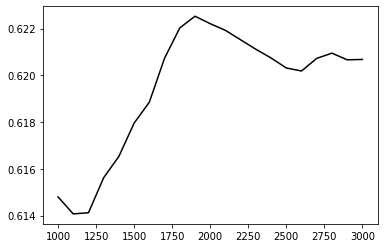

In [ ]:
# Use Support Vector Regressor to fit the data

# C : Regularization parameter. The strength of the regularization is inversely proportional to C.
c_list = [i*100 for i in range(10,31)]
svr_conf_list = []
best_c = -1
best_conf = -1
for c in c_list:
    # gamma : Kernel coefficient
    gamma = 0.00001

    # radial basis function kernel
    kernel="rbf"

    svr = SVR(kernel=kernel, C=c, gamma=gamma)
    svr.fit(new_train_X_10, new_train_y)

    svr_prediction = svr.predict(new_valid_X_10)
    svr_confidence = svr.score(new_valid_X_10, new_valid_y)
    print("svr confidence (c =", c,"):", svr_confidence)
    if svr_confidence > best_conf:
      best_conf = svr_confidence
      best_c = c
    svr_conf_list.append(svr_confidence)
    
plt.plot(c_list, svr_conf_list, label = "C to SVR Confid", color = 'Black')
print("Best C =", best_c)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svr confidence (gamma = 1e-07 ): 0.3915416186820738
svr confidence (gamma = 5e-07 ): 0.5267994131250884


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svr confidence (gamma = 1e-06 ): 0.5700823809749256
svr confidence (gamma = 5e-06 ): 0.6158497951734774


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svr confidence (gamma = 1e-05 ): 0.6225261730722231
svr confidence (gamma = 5e-05 ): 0.6206348133499968


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


svr confidence (gamma = 0.0001 ): 0.6175891783160139
svr confidence (gamma = 0.0005 ): 0.4625014234202647
Best Gamma: 1e-05


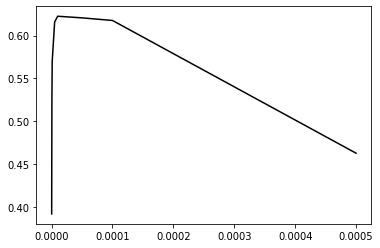

In [ ]:
# Use Support Vector Regressor to fit the data

# gamma : Kernel coefficient

gamma_list = [0.0000001,0.0000005,0.000001,0.000005,0.00001,0.00005,0.0001,0.0005]
svr_conf_list = []
best_conf = -1
best_gamma = -1
for gamma in gamma_list:
    # C : Regularization parameter. The strength of the regularization is inversely proportional to C.
    c = best_c

    # radial basis function kernel
    kernel="rbf"

    svr = SVR(kernel=kernel, C=c, gamma=gamma)
    svr.fit(new_train_X_10, new_train_y)

    svr_prediction = svr.predict(new_valid_X_10)
    svr_confidence = svr.score(new_valid_X_10, new_valid_y)
    print("svr confidence (gamma =", gamma,"):", svr_confidence)
    if svr_confidence > best_conf:
      best_conf = svr_confidence
      best_gamma = gamma
    svr_conf_list.append(svr_confidence)

    
plt.plot(gamma_list, svr_conf_list, label = "gamma to SVR Confid", color = 'Black')
print("Best Gamma:", best_gamma)

#### Model Testing

In [ ]:
# C : Regularization parameter. The strength of the regularization is inversely proportional to C.
c = 2600

# gamma : Kernel coefficient
gamma = 0.00001

# radial basis function kernel
kernel="rbf"

svr = SVR(kernel=kernel, C=c, gamma=gamma)
svr.fit(new_train_X_10, new_train_y)

svr_prediction = svr.predict(new_test_X_10)
svr_confidence = svr.score(new_test_X_10, new_test_y)
print("svr confidence:", svr_confidence)

try:
  with open("model/svr_"+str(num_day_to_predict)+"day.pickle", 'wb') as f:
      pickle.dump(svr, f)
except:
  best_model = svr



svr confidence: 0.5357356792750103


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
def convert_prediction(X,y,pred):
    col_list =[] 
    for col in X.columns:
        if "open" in col:
            col_list.append(col)
        
    mean_10_day = np.mean(X.loc[:,col_list],axis=1)
    mean_10_day.index = y.index
    std_10_day = np.std(X.loc[:,col_list],axis=1)
    std_10_day.index = y.index
    a = pd.DataFrame(index = y.index,columns=['mean','std','pred'])
    a.loc[:,"mean"] = mean_10_day
    a.loc[:,"std"] = std_10_day
    a.loc[:,"pred"] = pred
    a.loc[:,"converted"] = pred*std_10_day+mean_10_day
    return a

In [ ]:
try:
  with open("model/svr_"+str(num_day_to_predict)+"day.pickle", 'rb') as f:
      svr_test = pickle.load(f)
except:
  svr_test = svr



FileNotFoundError: ignored

#### Backtest Result for SVR

In [ ]:
#### SVR Backtest
backtest_summary = pd.DataFrame(columns=backtest_col)

for sector, stocks in stock_list.items():
    for stock in stocks:
        print("Runninng stock: "+ stock)
        stock_data_1 = web.DataReader(stock, "stooq",start=start_date, end=end_date)
        stock_data_1.columns = ["open","high","low","close","volume"]
        x_1 = StockDataFrame(stock_data_1)
        data_1 = x_1[['open','high','low','close','volume',
                      'boll', 'boll_ub', 'boll_lb',
                      'macd', 'macdh', 'macds',
                      'rsi_11', 'rsi_14', 'rsi_21']]
        data_1.index = [int(str(ind)[0:4]+str(ind)[5:7]+str(ind)[8:10]) for ind in data_1.index]
        data_1 = data_1.sort_index()
        print(stock + " Data loaded...")
        for k,v in date_range_list.items():
            
            print("Getting Data... - " + stock + " from " + str(k))
            if (data_1.index[0]>v):
                print("No data for this testing period... - " + stock + " from " + str(k))
                continue
            test_X = custom_split(data_1,start = k,end = v)
            if len(test_X) <= 10:
                print("No enoguh data for testing... - " + stock + " from " + str(k))
                continue
                
            print("Transforming Data... - " + stock + " from " + str(k))
            test_y = produce_result_target_price(test_X,num_day_to_predict)
            test_X_10 = transform_x_data_to_one_vector(test_X,num_day_to_predict)
            new_test_X_10  = drop_nan_row_X_10(test_X_10,num_day_to_predict)
            new_test_y = drop_nan_row_y(test_y,num_day_to_predict)
            old_test_X_10 = new_test_X_10.copy()
            old_test_y = new_test_y.copy()
            new_test_X_10,new_test_y = normalize_data_by_row(new_test_X_10,new_test_y)
            
            print("Predicting... - " + stock + " from " + str(k))
            svr_prediction = svr_test.predict(new_test_X_10)
            
            print("Converting... - " + stock + " from " + str(k))
            pred_df = convert_prediction(old_test_X_10,old_test_y,svr_prediction)
            converted_pred = pred_df.loc[:,"converted"]
            pred_df["Action"] = pred_df.apply(lambda row: "Buy" if row["converted"] > row["mean"] else "Sell", axis=1)
            final_pred = pred_df.drop(columns=["mean","std","pred","converted"])
            final_test_y = old_test_y.rename(columns={"result_price":"Open"})
            
            print("Backtesting... - " + stock + " from " + str(k))
            back1 = backtest(final_test_y,final_pred,10000,0.0005,period_year)
            
            print("Start Iteration... - " + stock + " from " + str(k))
            back1.start_test()
            
            print("======= from "+ str(k) + " to " + str(v)+" =========")
            back1.print_do_nothing()
            back1.print_profit()
            back1.print_performance()
            back1.export_trade_record("SVR_"+sector+"-"+stock,str(k)+"-to-"+str(v)+"("+str(round(back1.get_performance()*100,2))+"%)")
            backtest_summary = backtest_summary.append({"Sector":sector,
                                                        "Stock":stock,
                                                        "Range_Start":str(k),
                                                        "Range_End":str(v),
                                                        do_nth_name+"_Profit":round(back1.get_do_nothing(),2),
                                                        model_name+"_Profit":round(back1.get_profit(),2),
                                                        do_nth_name+"_CAGR(in %)":round(back1.get_do_nothing_CAGR()*100,2),
                                                        model_name+"_CAGR(in %)":round(back1.get_model_CAGR()*100,2),
                                                        "CAGR_Performance(in %)":round(back1.get_diff_in_CAGR()*100,2),
                                                        do_nth_name+"_MDD(in %)":round(back1.get_do_nothing_MDD()*100,2),
                                                        model_name+"_MDD(in %)":round(back1.get_model_MDD()*100,2),
                                                        "MDD_Performance(in %)":round(back1.get_diff_in_MDD()*100,2)}, ignore_index=True)
            print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

print("Backtesting Completed...")
backtest_summary.to_csv("backtest_summary_SVR.csv")

In [ ]:

mean_backtest_summary = backtest_summary.groupby("Stock")[["Stock",
                                                          do_nth_name+"_Profit",
                                                          model_name+"_Profit",
                                                          do_nth_name+"_CAGR(in %)",
                                                          model_name+"_CAGR(in %)",
                                                          "CAGR_Performance(in %)",
                                                          do_nth_name+"_MDD(in %)",
                                                          model_name+"_MDD(in %)",
                                                          "MDD_Performance(in %)"]].mean()

mean_backtest_summary = mean_backtest_summary.add_prefix("mean_")

mean_backtest_summary = mean_backtest_summary.round(decimals = 2)
mean_backtest_summary.to_csv("backtest_summary_SVR_mean.csv")

## Thomas

 DTC

In [ ]:
stock_test = stock[1000: :]
stock_train = stock[0:1000:]

In [ ]:
x_train = stock_train[features]
x_test= stock_test[features]

y_train = np.where(stock_train.Return > 0,1,0)
y_test = np.where(stock_test.Return> 0,1,0)

In [ ]:
TC = DecisionTreeClassifier(max_depth=3,min_samples_leaf=6)
TC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [ ]:
y_pred = TC.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.50      0.62       210
           1       0.20      0.56      0.30        48

    accuracy                           0.51       258
   macro avg       0.52      0.53      0.46       258
weighted avg       0.71      0.51      0.56       258



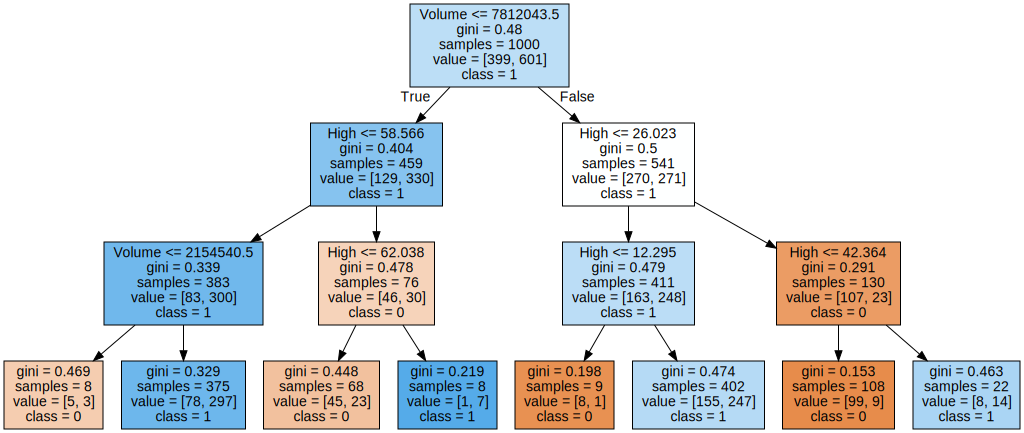

In [ ]:
from sklearn import tree 
import graphviz
data = tree.export_graphviz(TC,filled=True,feature_names=features,class_names=np.array(['0','1']))
graphviz.Source(data)

SVR

In [ ]:
stock_svr = stock.reset_index()

In [ ]:
dates = stock_svr.index.tolist()
dates_arr = [[i]for i in dates]

In [ ]:
High = stock['High'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dates_arr, High, test_size = 0.25)

In [ ]:
lin_svr = SVR(kernel='linear')

poly_svr = SVR(kernel='poly', C=1000.0, degree = 2)

rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)

In [ ]:
lin_svr.fit(x_train,y_train)
poly_svr.fit(x_train,y_train)
rbf_svr.fit(x_train,y_train)

SVR(C=1000.0, gamma=0.15)

In [ ]:
lin_svr_predict = lin_svr.predict(x_test)

print('Lin_svr:')
print('   r2 score: '+str(r2_score(y_test, lin_svr_predict)))
print('   RMSE : '+str(np.sqrt(mean_squared_error(y_test, lin_svr_predict))))
print("   Mean Absolute Error : " + str(mean_absolute_error(y_test, lin_svr_predict)))

Lin_svr:
   r2 score: 0.764299553523393
   RMSE : 8.517479789724964
   Mean Absolute Error : 5.917668571545155


In [ ]:
poly_svr_predict = poly_svr.predict(x_test)

print('poly_svr:')
print('   r2 score: '+str(r2_score(y_test, poly_svr_predict)))
print('   RMSE : '+str(np.sqrt(mean_squared_error(y_test, poly_svr_predict))))
print("   Mean Absolute Error : " + str(mean_absolute_error(y_test, lin_svr_predict)))

poly_svr:
   r2 score: 0.7228839220985532
   RMSE : 9.235528886120505
   Mean Absolute Error : 5.917668571545155


In [ ]:
rbf_svr_predict = rbf_svr.predict(x_test)

print('rbf_svr:')
print('   r2 score: '+str(r2_score(y_test, rbf_svr_predict)))
print('   RMSE : '+str(np.sqrt(mean_squared_error(y_test, rbf_svr_predict))))
print("   Mean Absolute Error : " + str(mean_absolute_error(y_test, rbf_svr_predict)))

rbf_svr:
   r2 score: 0.9854747052026853
   RMSE : 2.1144303641502735
   Mean Absolute Error : 1.198691319045762


# Backtesting Module


In [ ]:
################### Input ##########################
# For hist_price_data: index=["date"], columns = ["Open"]
# For pred_action: index=["date"], columns = ["Action"] (Buy/Sell)
################### Output #########################
# 1. trading record
# 2. total profit
class backtest:
    hpd = ""
    pred_action=pd.DataFrame()
    trade_record=pd.DataFrame(index=[],
                              columns=["Action","Price","Position","Cash","Pos_Bal","Cash_Bal","Cum_Profit"],
                             )
    capital = 0
    cash_balance = 0
    profit = 0
    handle_fee = 0
    position = 0
    last_price = 0
    do_nth_profit = 0
    num_year = 0
    _tested = False
    
    _stock_trough = 0
    _stock_peak = 0
    _stock_all_time_low = 0
    _stock_all_time_high = 0
    
    _portfolio_trough = 0
    _portfolio_peak = 0
    _portfolio_all_time_low = 0
    _portfolio_all_time_high = 0
    
    def __init__(self,hist_price_data,pred_action,capital,handling_fee,num_year=1):
        self.hpd = hist_price_data
        self.pred_action = pred_action
        self.capital = capital
        self.cash_balance = capital
        self._portfolio_trough = capital
        self._portfolio_peak = capital
        self._portfolio_all_time_low = capital
        self._portfolio_all_time_high = capital
        self.handle_fee = handling_fee
        self.num_year = num_year
        trade_record=pd.DataFrame(index=[],
                                  columns=["Action","Price","Position","Cash","Pos_Bal","Cash_Bal","Cum_Profit"],
                                 )        
        
    def start_test(self): 
        if not self._tested:  
            self._tested = True
            print("Start Backtesting...")  
            self._stock_all_time_low = self.hpd.iloc[0,0]
            self._stock_all_time_high = self.hpd.iloc[0,0]
            self._stock_trough = self.hpd.iloc[0,0]
            self._stock_peak = self.hpd.iloc[0,0]
            # For loop to iterate the data
            for ind in self.pred_action.index:
                # Update latest price
                self.last_price = self.hpd.loc[ind,"Open"]
                
                # Mark All Time Low,High , Trough and Peak for MDD of stock price (using "Buy&Hold")
                if self.last_price > self._stock_all_time_high:
                    self._stock_all_time_high = self.last_price
                if self.last_price < self._stock_all_time_low:
                    self._stock_all_time_low = self.last_price
                if self.last_price > self._stock_all_time_low and self._stock_trough != self._stock_all_time_low:
                    self._stock_trough = self._stock_all_time_low
                if self.last_price < self._stock_all_time_high and self._stock_peak != self._stock_all_time_high:
                    self._stock_peak = self._stock_all_time_high
                
                # Do the action
                if self.pred_action.loc[ind,"Action"].lower() == "buy":
                    self._buy(ind,self.last_price)
                elif self.pred_action.loc[ind,"Action"].lower() == "sell":
                    self._sell(ind,self.last_price)
                else:
                    #print("Did not buy at " + str(ind))
                    pass
                
                curr_portfolio_val = self.get_capital()+self.get_profit()
                
                # Mark All Time Low,High , Trough and Peak for MDD of our portfolio balance (using our model)
                if curr_portfolio_val > self._portfolio_all_time_high:
                    self._portfolio_all_time_high = curr_portfolio_val
                if curr_portfolio_val < self._portfolio_all_time_low:
                    self._portfolio_all_time_low = curr_portfolio_val
                if curr_portfolio_val > self._portfolio_all_time_low and self._portfolio_trough != self._portfolio_all_time_low:
                    self._portfolio_trough = self._portfolio_all_time_low
                if curr_portfolio_val < self._portfolio_all_time_high and self._portfolio_peak != self._portfolio_all_time_high:
                    self._portfolio_peak = self._portfolio_all_time_high
                            
            # =================================================
            self._run_do_nothing() # Calculate do nothing profit
        else:
            print("Backtesting has been completed...")
              
                
        
    def _mark_down_record(self,date,action,price,pos_delta,cash_delta):
        self.trade_record.loc[date,"Action"] = action
        self.trade_record.loc[date,"Price"] = price
        self.trade_record.loc[date,"Position"] = pos_delta
        self.trade_record.loc[date,"Cash"] = cash_delta
        
        self.trade_record.loc[date,"Pos_Bal"] = round(self.position,4)
        self.trade_record.loc[date,"Cash_Bal"] = round(self.cash_balance,3)
        self.trade_record.loc[date,"Cum_Profit"] = round(self.get_profit(),3)
        
    def _buy(self,date,price):
        # Assume use all money to buy all
        buy_pos = floor(self.cash_balance / price)
        for i in range(buy_pos+1):
            act_buy_pos = buy_pos - i
            if act_buy_pos == 0:
                #print("You do not have enough money to buy!")
                return
            total_amt = act_buy_pos*price*(1+self.handle_fee)
            if self.cash_balance > total_amt:
                self.position += act_buy_pos
                self.cash_balance -= total_amt
                self._mark_down_record(date,
                                       "Buy",
                                       price,
                                       act_buy_pos,
                                       -total_amt)
                print("Bought at",date,"with price =", price, "\tPos:", act_buy_pos)
                return
        
    
    def _sell(self,date,price):
        # Assume sell all position
        sell_pos = self.position
        total_amt = sell_pos*price*(1-self.handle_fee)
        if self.position >= 1:
            self.position -= sell_pos
            self.cash_balance += total_amt
            self._mark_down_record(date,
                                   "Sell",
                                   price,
                                   -sell_pos,
                                   total_amt)
            print("Sold at",date,"with price =", price, "\tPos:", sell_pos)
            
            return

    def _run_do_nothing(self):
        balance = self.capital
        first_day_price = self.hpd.iloc[0,0]
        last_day_price = self.hpd.iloc[-1,0]
        buy_pos = floor(self.capital / first_day_price) # Calculate how many position can buy
        total_amt = buy_pos*first_day_price*(1+self.handle_fee) # Check if okay to buy (including fee)
        while self.capital < total_amt: # If not enough, reduce buy_pos by 1
            buy_pos -= 1
            total_amt = buy_pos*first_day_price*(1+self.handle_fee)
        position = buy_pos # Buy in 
        balance -= total_amt
        self.do_nth_profit = last_day_price*position+balance-self.capital

    def get_performance(self):
        if self._tested:
            model_profit = self.get_profit()
            do_nth_profit = self.get_do_nothing()
            perf = (model_profit-do_nth_profit)/abs(do_nth_profit)
            return perf
        else:
            print("No Backtesting Record.")

    def get_do_nothing(self):
        if self._tested:
            return self.do_nth_profit
        else:
            print("No Backtesting Record.")

    def get_profit(self):
        if self._tested:
            return self.get_cash_balance()+self.get_last_price()*self.get_position()-self.get_capital()
        else:
            print("No Backtesting Record.")

    def get_last_price(self):
        if self._tested:
            return self.last_price
        else:
            print("No Backtesting Record.")
    
    def get_position(self):
        if self._tested:
            return self.position
        else:
            print("No Backtesting Record.")
    
    def get_do_nothing_CAGR(self):
        if self._tested:
            start_bal = self.get_capital()
            end_bal = self.get_do_nothing()+self.get_capital()
            num_year = self.get_num_year()
            return pow(end_bal/start_bal,1/num_year)-1
        else:
            print("No Backtesting Record.")
            
    def get_model_CAGR(self):
        if self._tested:
            start_bal = self.get_capital()
            end_bal = self.get_profit()+self.get_capital()
            num_year = self.get_num_year()
            return pow(end_bal/start_bal,1/num_year)-1
        else:
            print("No Backtesting Record.")
            
    def get_diff_in_CAGR(self):
        if self._tested:
            return self.get_model_CAGR() - self.get_do_nothing_CAGR()
        else:
            print("No Backtesting Record.")
    
    def get_do_nothing_MDD(self):
        if self._tested:
            return (self._stock_trough-self._stock_peak)/self._stock_peak
        else:
            print("No Backtesting Record.")
            
    def get_model_MDD(self):
        if self._tested:
            return (self._portfolio_trough-self._portfolio_peak)/self._portfolio_peak
        else:
            print("No Backtesting Record.")
            
    def get_diff_in_MDD(self):
        if self._tested:
            return self.get_model_MDD() - self.get_do_nothing_MDD()
        else:
            print("No Backtesting Record.")
    
    def get_num_year(self):
        return self.num_year
    
    def get_cash_balance(self):
        return self.cash_balance
    
    def get_capital(self):
        return self.capital
    
    def get_amount(self):
        return self.get_capital()+self.get_profit()

    def print_do_nothing(self):
        if self._tested:
            print("If buy at", self.hpd.index[0],"with price =",self.hpd.iloc[0,0])
            print("and do nothing")
            print("Current Profit:",self.get_do_nothing())
        else:
            print("No Backtesting Record.")
            
    def print_performance(self):
        if self._tested:
            print("Performance:", str(round(self.get_performance()*100,2))+"%")
        else:
            print("No Backtesting Record.")
    
    def print_trade_record(self):
        if self._tested:
            print(self.trade_record)
        else:
            print("No Backtesting Record.")
    
    def print_profit(self):
        if self._tested:
            print("Current Profit with model:",self.get_profit())
        else:
            print("No Backtesting Record.")
    
    def export_trade_record(self,stock,add_msg = ""):
        if self._tested:
            # Save the trade record to the path
            if not add_msg == "":
                add_msg = "_" + add_msg
            self.trade_record.to_csv("trade_record/"+stock+add_msg+".csv")
        else:
            print("No Backtesting Record.")

NameError: ignored